### Clase 9/9/25: repaso de Álgebra básico y transformaciones lineales. Intro normas.

##### Numpy ABC

Tenemos vectores $v \in \mathbb{R}^n$ (a.k.a puntos) y transformaciones lineales $A \in \mathbb{R}^{m \times n}$ o $f(v) \in R^m$ (a.k.a matrices).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
v = np.array([1,1,1]) # Un vector
print(v)
v2 = np.random.rand(3) # Otro pero al azar
print(v2)
v3 = np.random.rand(3,2)
print(v3) # Dos vectores? Tres vectores? Una matriz?

[1 1 1]
[0.9203756  0.36885692 0.09234317]
[[0.27464948 0.28991109]
 [0.22853779 0.26852782]
 [0.71902088 0.95071664]]


In [2]:
print(v2@v2) # Un producto interno entre vectores u = sum_j v_j v_j
print(v2.reshape(3,1)) # Un vector "encolumnado"
print( ( v2.reshape(3,1) )@ ( v2.reshape(1,3) ) ) # Producto "externo" Aij = vi vj

0.9916739249915506
[[0.9203756 ]
 [0.36885692]
 [0.09234317]]
[[0.84709124 0.33948691 0.0849904 ]
 [0.33948691 0.13605543 0.03406142]
 [0.0849904  0.03406142 0.00852726]]


In [3]:
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(A) # Una matriz
print(A@v) # f(v) un vector
print(v.T @ A.T) # El mismo vector pero traspuesto

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[ 6 15 24]
[ 6 15 24]


In [4]:
# Para jugar viendo un poco del error de punto flotante, el condicionamiento de matrices, y lo que quieran.
E = 1e-16
A = np.array([[1-E,1+E],[1+E,1-E]])
v = np.array([E,-E])
print(A@np.linalg.solve(A,v)/E)

[ 1.         -1.11022302]


In [5]:
# Un proyector
v2 = v2/np.sqrt(v2@v2) # Normalizamos v2
P = np.eye(len(v2)) - ( v2.reshape(3,1) ) @ ( v2.reshape(1,3) ) # Un proyector
v4 = P@np.random.rand(len(v2)) # Un vector ortogonal a v2
v4@v2 # Fijense que el error de punto flotante hace que no sea exactamente cero

np.float64(1.6046192152785466e-16)

Todo lo que van a necesitar (y posiblemente más) lo pueden encontrar en la introducción a Python que hay en el campus.

##### Transformaciones lineales

Toda transformación lineal puede escribirse como una matriz estableciendo un homomorfismo entre vectores canónicos y vectores de la base en cuestión.

Gracias a esto podemos pensar a las transformaciones lineales simplemente como matrices, pero recuerden que son mucho más.

Tomemos una matriz $A \in \mathbb{R}^{m \times n}$

#### Las TL tienen núcleo: $x \in \mathbb{R}^n: Ax = 0$

In [6]:
# Veremos métodos más sofisticados luego, por ahora lo hacemos con Monte Carlo:

A =  np.array([[1,1],[1,1]])

# Tiene en el núcleo el <(1,-1)>

In [7]:
# Lo vemos usando la grilla del L02
def pointsGrid(esquinas):
    # crear 10 lineas horizontales
    [w1, z1] = np.meshgrid(np.linspace(esquinas[0,0], esquinas[1,0], 46),
                        np.linspace(esquinas[0,1], esquinas[1,1], 10))

    [w2, z2] = np.meshgrid(np.linspace(esquinas[0,0], esquinas[1,0], 10),
                        np.linspace(esquinas[0,1], esquinas[1,1], 46))

    w = np.concatenate((w1.reshape(1,-1),w2.reshape(1,-1)),1)
    z = np.concatenate((z1.reshape(1,-1),z2.reshape(1,-1)),1)
    wz = np.concatenate((w,z))
                         
    return wz

def proyectarPts(T, wz):
    assert(T.shape == (2,2)) # chequeo de matriz 2x2
    assert(T.shape[1] == wz.shape[0]) # multiplicacion matricial valida   
    xy = T@wz
    return xy

          
def vistform(T, wz, titulo=''):
    # transformar los puntos de entrada usando T
    xy = proyectarPts(T, wz)
    if xy is None:
        print('No fue implementada correctamente la proyeccion de coordenadas')
        return
    # calcular los limites para ambos plots
    minlim = np.min(np.concatenate((wz, xy), 1), axis=1)
    maxlim = np.max(np.concatenate((wz, xy), 1), axis=1)

    bump = [np.max(((maxlim[0] - minlim[0]) * 0.05, 0.1)),
            np.max(((maxlim[1] - minlim[1]) * 0.05, 0.1))]
    limits = [[minlim[0]-bump[0], maxlim[0]+bump[0]],
               [minlim[1]-bump[1], maxlim[1]+bump[1]]]             

    fig, (ax1, ax2) = plt.subplots(1, 2)         
    fig.suptitle(titulo)
    grid_plot(ax1, wz, limits, 'w', 'z')    
    grid_plot(ax2, xy, limits, 'x', 'y')

def grid_plot(ax, ab, limits, a_label, b_label):
    ax.plot(ab[0,:], ab[1,:], '.')
    ax.set(aspect='equal',
           xlim=limits[0], ylim=limits[1],
           xlabel=a_label, ylabel=b_label)


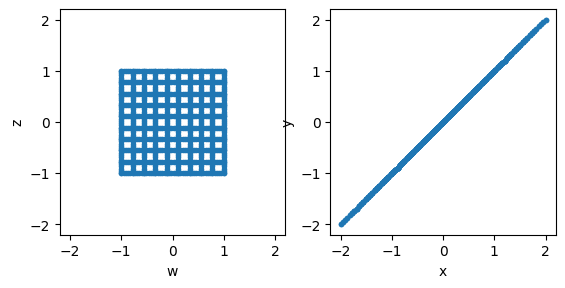

In [8]:
wz = pointsGrid(np.array([[-1,-1],[1,1]]))
vistform(A,wz)

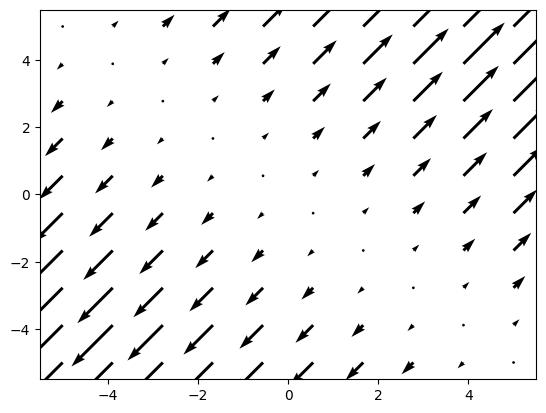

In [9]:
# Otra forma de verlo, con quiver:
x = np.linspace(-5, 5, 10)   # 5 puntos en X
y = np.linspace(-5, 5, 10)   # 5 puntos en Y
X, Y = np.meshgrid(x, y)

# Armar V como 2xN (cada columna es un punto de la grilla)
V = np.vstack([X.ravel(), Y.ravel()])
VX,VY = A@V

# Graficar
fig, ax = plt.subplots()
    
# Vectores originales en azul
ax.quiver(
    X,Y,
    VX,VY
)

#### Las TL tienen imagen: son los $y \in \mathbb{R}^m : y=Ax, x \in \mathbb{R}^n$

¿Dónde se ve en las figuras anteriores?

In [10]:
# Las rotaciones tienen núcleo trivial

def rota(theta):
    R = np.array([[np.cos(theta),-np.sin(theta)],
              [np.sin(theta),np.cos(theta)]])
    return R

R = rota(np.pi/4)

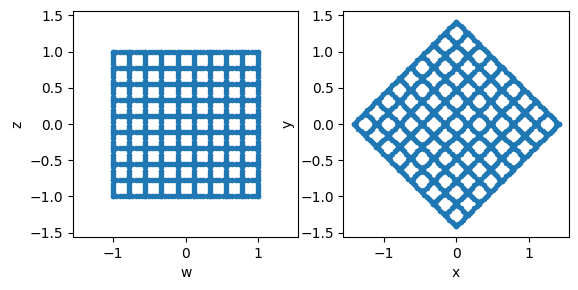

In [11]:
wz = pointsGrid(np.array([[-1,-1],[1,1]]))
vistform(R,wz)

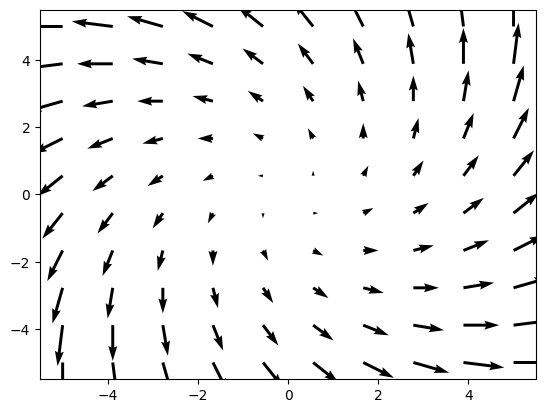

In [12]:
VX,VY = R@V

# Graficar
fig, ax = plt.subplots()
    
# Vectores originales en azul
ax.quiver(
    X,Y,
    VX,VY
)
# ¿Por qué parece "divergente", si sólo rota al sistema?

#### Normas

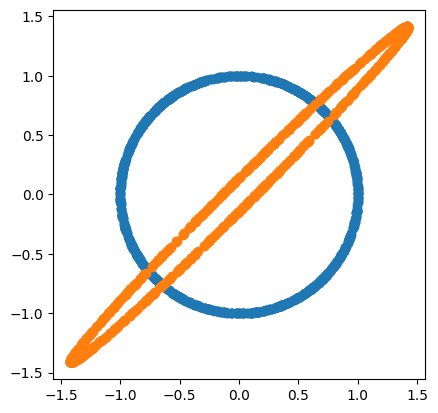

In [13]:
import numpy as np
import matplotlib.pyplot as plt
E = 1e-1
A = np.array([[1+E,1-E],[1,1]])

puntos = np.random.rand(2,1000)-0.5
puntos = np.array([punto/np.sqrt(punto@punto) for punto in puntos.T]).T
tpuntos = A@puntos
plt.scatter(puntos[0],puntos[1],label='partida')
plt.scatter(tpuntos[0],tpuntos[1],label='llegada')
plt.gca().set_aspect('equal')


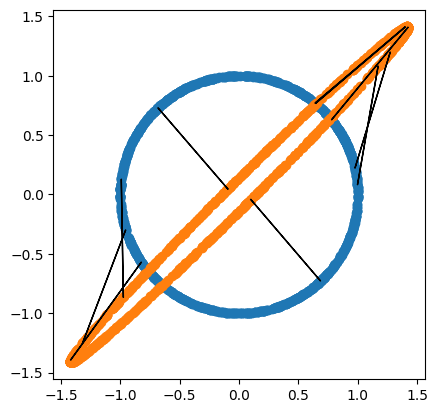

In [14]:
import numpy as np
import matplotlib.pyplot as plt
E = 1e-1
A = np.array([[1+E,1-E],[1,1]])

puntos = np.random.rand(2,1000)-0.5
puntos = np.array([punto/np.sqrt(punto@punto) for punto in puntos.T]).T
tpuntos = A@puntos
plt.scatter(puntos[0],puntos[1],label='partida')
plt.scatter(tpuntos[0],tpuntos[1],label='llegada')
for i in range(10):
    plt.arrow(puntos[0][i],puntos[1][i],tpuntos[0][i]-puntos[0][i],tpuntos[1][i]-puntos[1][i])
plt.gca().set_aspect('equal')


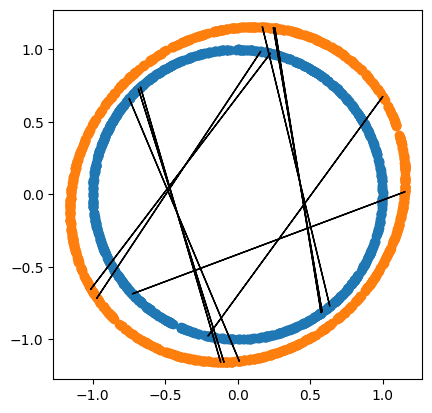

In [15]:
import numpy as np
import matplotlib.pyplot as plt
def expande(diagonal):
    return np.diag(diagonal)
A =  expande([1.1,1]) @ rota(np.pi/4) @ expande([1.1,1]) @ rota(np.pi/4) @ expande([1.1,1]) @ rota(np.pi/4)

puntos = np.random.rand(2,1000)-0.5
puntos = np.array([punto/np.sqrt(punto@punto) for punto in puntos.T]).T
tpuntos = A@puntos
plt.scatter(puntos[0],puntos[1],label='partida')
plt.scatter(tpuntos[0],tpuntos[1],label='llegada')
for i in range(10):
    plt.arrow(puntos[0][i],puntos[1][i],tpuntos[0][i]-puntos[0][i],tpuntos[1][i]-puntos[1][i])
plt.gca().set_aspect('equal')
